# NetworkX -> Bokeh: Change node color and size with node attributes

This note is an example code for answers to the following questions.
- https://stackoverflow.com/questions/52673098/how-to-pass-node-attributes-from-networkx-to-bokeh

In [1]:
import sys
from math import sqrt

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import bokeh
from bokeh.io import show, output_notebook, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, StaticLayoutProvider
from bokeh.models import HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx

%matplotlib inline

In [2]:
print('NetworkX: {}'.format(nx.__version__))
print('Bokeh: {}'.format(bokeh.__version__))
print('Python: {}.{}.{}'.format(sys.version_info.major, sys.version_info.minor, sys.version_info.micro))

NetworkX: 2.2rc1.dev_20181012091755
Bokeh: 0+unknown
Python: 3.6.2


# How to change node color with node attributes
- <span class="mark">Bokeh versions before 1.0 </span>
    - from_networkx does **NOT** pass the node/edge attributes.
- <span class="mark">Bokeh 1.0 and beyond</span>
    - from_networkx **passes** the node/edge attributes to GraphRenderer's node_renderer/edge_renderer.
    - Thefore it's possible to hover these information using the node attributes converted in from_networkx.
    - Similarly, node/edge attributes can also be used for color information.
    - **See Also:**
        + **issue [#8183](https://github.com/bokeh/bokeh/issues/8183) [Feature Request] In the function ‘from_networkx’, convert NetworkX node/edge attributes to Bokeh node_renderer/edge_renderer data_source.**

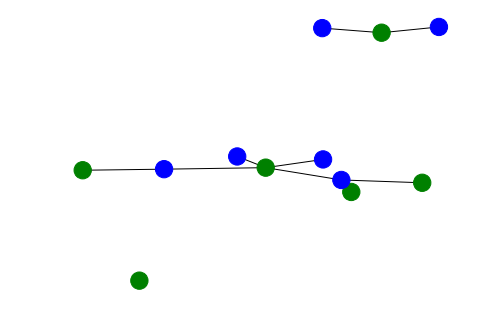

In [3]:
# Prepare Data
Dataset1 = ['A', 'B', 'C', 'D', 'E', 'F']
Dataset2 = ['ONE', 'TWO', 'THREE', 'FOUR', 'FIVE', 'TWENTY_EIGHT']
Edgelist = [('A', 'ONE'), ('B', 'ONE'), ('E', 'ONE'), ('A', 'TWO'),
            ('A', 'THREE'), ('A', 'FOUR'), ('C', 'THREE'), ('D', 'FIVE'), ('D', 'TWENTY_EIGHT')]
G = nx.Graph()
G.add_nodes_from(Dataset1, color= 'green')  
G.add_nodes_from(Dataset2, color='blue') 
G.add_edges_from(Edgelist, weight=0.8)

layout = nx.spring_layout(G, k= 1.1 / sqrt(G.number_of_nodes()), iterations=100)

# Draw with NetworkX / matplotlib
nx.draw(G, layout, node_color=[attr['color'] for node, attr in G.nodes(data=True)])

In [4]:
# Start Bokeh Code

# From bokeh 1.0, it is now possible to pass a fixed layout to the 'layout_function' attribute of ''from_networkx' function.
# See Also: issue #8311 (https://github.com/bokeh/bokeh/issues/8311)
graph_renderer = from_networkx(G, layout)

plot = Plot(plot_width=500, plot_height=300,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

# from_networkx passes the node/edge attributes to GraphRenderer's node_renderer/edge_renderer.
# See Also: issue #8183 (https://github.com/bokeh/bokeh/issues/8183)
# Change node color with node attributes named  ''color'
graph_renderer.node_renderer.glyph = Circle(size=8, fill_color='color')
graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.8, line_width=1)

# 'index' has node keys
hover = HoverTool(tooltips=[('name', '@index')])
plot.add_tools(hover, BoxZoomTool(), ResetTool())

plot.renderers.append(graph_renderer)

output_notebook()
show(plot)

Loading BokehJS ...

# How to access node/edge attributes and layout in Bokeh
- See Also:
    + GraphRenderer: https://bokeh.pydata.org/en/latest/docs/reference/models/renderers.html#bokeh.models.renderers.GraphRenderer

In [5]:
# Node attributes in Bokeh's GraphRenderer
# 'index' is node key
graph_renderer.node_renderer.data_source.data

{'color': ['green',
  'green',
  'green',
  'green',
  'green',
  'green',
  'blue',
  'blue',
  'blue',
  'blue',
  'blue',
  'blue'],
 'index': ['A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'ONE',
  'TWO',
  'THREE',
  'FOUR',
  'FIVE',
  'TWENTY_EIGHT']}

In [6]:
# Edge attributes in Bokeh's GraphRenderer
# 'start' and 'end' are edge keys
graph_renderer.edge_renderer.data_source.data

{'weight': [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
 'start': ['A', 'A', 'A', 'A', 'B', 'C', 'D', 'D', 'E'],
 'end': ['ONE',
  'TWO',
  'THREE',
  'FOUR',
  'ONE',
  'THREE',
  'FIVE',
  'TWENTY_EIGHT',
  'ONE']}

In [7]:
# Layout
graph_renderer.layout_provider.graph_layout

{'A': array([-0.02574367, -0.16390105]),
 'B': array([ 0.14616558, -0.27576959]),
 'C': array([-0.22675942, -0.18301385]),
 'D': array([ 0.10155118,  0.83473193]),
 'E': array([ 0.06825303, -0.34378057]),
 'F': array([-0.1645189, -1.       ]),
 'ONE': array([ 0.05736012, -0.25495901]),
 'TWO': array([-0.05706023, -0.08111262]),
 'THREE': array([-0.13739365, -0.17515137]),
 'FOUR': array([ 0.03725502, -0.10302173]),
 'FIVE': array([ 0.16453467,  0.87728601]),
 'TWENTY_EIGHT': array([ 0.03635626,  0.86869184])}

# How to change node size with node attributes
- It's possible to change node size with node attributes in a similar way.
- However, there are a few points to note.
    - NetworkX's nx.draw function (matplotlib): 'size' is **area** of circle
    - Bokeh's Circle: 'size' is **radius** of circle
    - Therefore, **it's necessary to to adjust the size for bokeh**

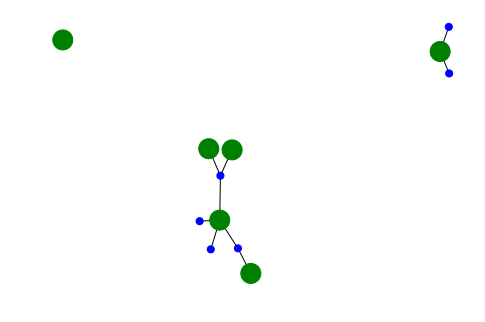

In [8]:
# Prepare Data
Dataset1 = ['A', 'B', 'C', 'D', 'E', 'F']
Dataset2 = ['ONE', 'TWO', 'THREE', 'FOUR', 'FIVE', 'TWENTY_EIGHT']
Edgelist = [('A', 'ONE'), ('B', 'ONE'), ('E', 'ONE'), ('A', 'TWO'),
            ('A', 'THREE'), ('A', 'FOUR'), ('C', 'THREE'), ('D', 'FIVE'), ('D', 'TWENTY_EIGHT')]
G = nx.Graph()
G.add_nodes_from(Dataset1, color='green')
G.add_nodes_from(Dataset2, color='blue')

# Add size information as node attributes
G.add_nodes_from(Dataset1, size_for_networkx=400)
G.add_nodes_from(Dataset2, size_for_networkx=50)

G.add_edges_from(Edgelist, weight=0.8)

layout = nx.spring_layout(G, k= 1.1 / sqrt(G.number_of_nodes()), iterations=100)

# Draw with NetworkX / matplotlib
nx.draw(G,
        layout,
        node_color=[attr['color'] for node, attr in G.nodes(data=True)],
        node_size=[attr['size_for_networkx'] for node, attr in G.nodes(data=True)])

In [9]:
# Set node size for Bokeh
def calc_radius(area: float) -> float:
    r = np.sqrt(area / np.pi)
    return r

size_for_bokeh = {node: calc_radius(attr['size_for_networkx']) for node, attr in G.nodes(data=True)}
nx.set_node_attributes(G, size_for_bokeh, 'size_for_bokeh')

# Start Bokeh code
graph_renderer = from_networkx(G, layout)

plot = Plot(plot_width=500, plot_height=300,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

# Change node size with node attributes
graph_renderer.node_renderer.glyph = Circle(size='size_for_bokeh', fill_color='color')
graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.8, line_width=1)

hover = HoverTool(tooltips=[('name', '@index')])
plot.add_tools(hover, BoxZoomTool(), ResetTool())

plot.renderers.append(graph_renderer)

output_notebook()
show(plot)

Loading BokehJS ...

- repository:
    + https://github.com/komo-fr/networkx2bokeh_note/blob/master/notebooks/how_to_change_color_and_size.ipynb
- nbviewer:
    + http://nbviewer.jupyter.org/github/komo-fr/networkx2bokeh_note/blob/master/notebooks/how_to_change_color_and_size.ipynb